In [347]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torch import nn

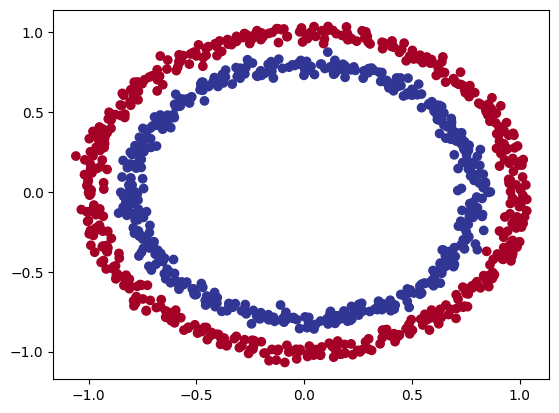

In [348]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

fig, ax = plt.subplots()
ax.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu)

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [349]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred). sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [350]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.layer_2 = nn.Linear(in_features=8, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [351]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_3 = CircleModelV2().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.07)
model_3.state_dict

epoch_list = []
test_loss_list = []
loss_list = []

In [352]:
model_3 = model_3.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 10000

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,
                            y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch % 10 == 0:
        epoch_list.append(epoch)
        test_loss_list.append(test_loss)
        loss_list.append(loss)

        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:5f}, Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69425, Acc: 50.00 | Test loss: 0.693675, Test acc: 50.00
Epoch: 10 | Loss: 0.69335, Acc: 50.00 | Test loss: 0.692764, Test acc: 50.00
Epoch: 20 | Loss: 0.69279, Acc: 50.00 | Test loss: 0.692211, Test acc: 50.00
Epoch: 30 | Loss: 0.69243, Acc: 50.00 | Test loss: 0.691855, Test acc: 50.00
Epoch: 40 | Loss: 0.69217, Acc: 50.00 | Test loss: 0.691613, Test acc: 50.00
Epoch: 50 | Loss: 0.69197, Acc: 50.00 | Test loss: 0.691434, Test acc: 50.00
Epoch: 60 | Loss: 0.69180, Acc: 50.00 | Test loss: 0.691292, Test acc: 50.00
Epoch: 70 | Loss: 0.69164, Acc: 50.00 | Test loss: 0.691172, Test acc: 50.00
Epoch: 80 | Loss: 0.69150, Acc: 51.25 | Test loss: 0.691064, Test acc: 50.50
Epoch: 90 | Loss: 0.69136, Acc: 53.62 | Test loss: 0.690962, Test acc: 52.00
Epoch: 100 | Loss: 0.69122, Acc: 54.12 | Test loss: 0.690866, Test acc: 54.50
Epoch: 110 | Loss: 0.69108, Acc: 55.62 | Test loss: 0.690769, Test acc: 54.00
Epoch: 120 | Loss: 0.69094, Acc: 56.88 | Test loss: 0.690671, Test acc: 55.

In [353]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else: 
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


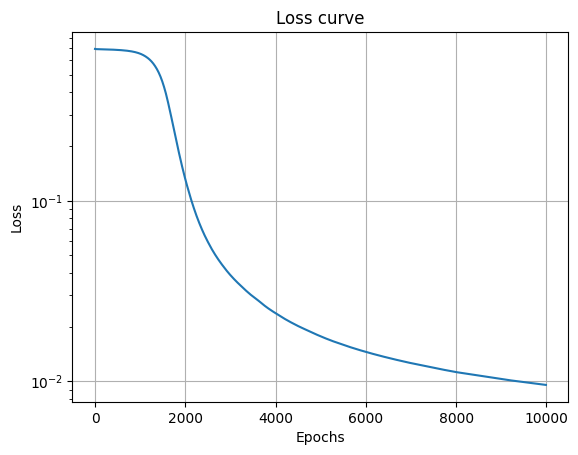

In [366]:
fig, ax = plt.subplots()
ax.plot(epoch_list, torch.tensor(test_loss_list).cpu().numpy())
ax.set_title("Loss curve")
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs")
ax.set_yscale('log')
ax.grid()

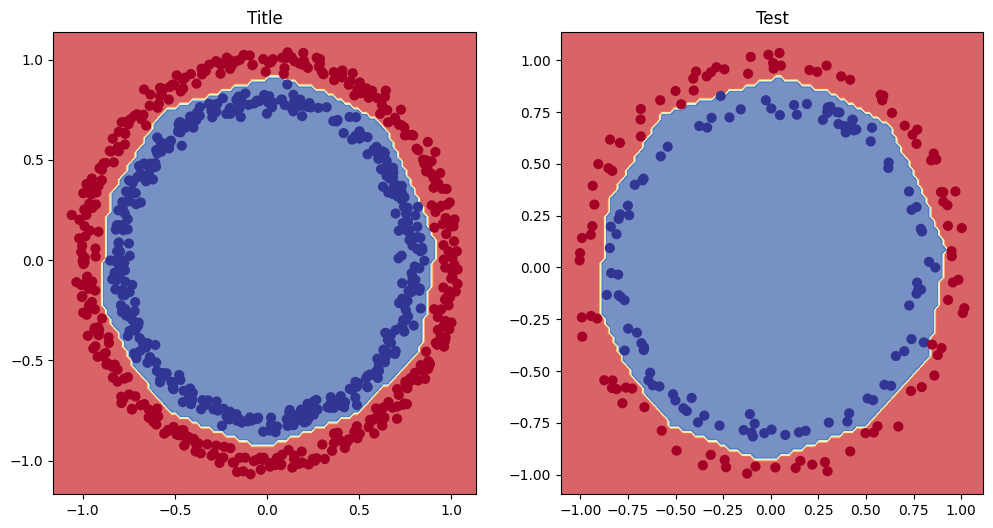

In [355]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Title")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)